In [3]:
print("1. Realizar un análisis exploratorio de los datos para identificarrelaciones entre variables, valores atípicos, tendencias, etc.")

1. Realizar un análisis exploratorio de los datos para identificarrelaciones entre variables, valores atípicos, tendencias, etc.


In [5]:
#librerias
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
# lectura de datos cargamos en la variable Data

Data = pd.read_csv('./emfermedades.csv')

In [17]:
# Realizamos lectura de los Datos para el análisis exploratorio

Data.head(115)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,54,0,2,135,304,1,0,170,0,0.0,0,0,0,0
111,54,1,2,150,232,0,2,165,0,1.6,0,0,2,0
112,54,0,2,108,267,0,2,167,0,0.0,0,0,0,0
113,54,0,2,160,201,0,0,163,0,0.0,0,1,0,0


In [7]:
# Descripción de los datos
Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

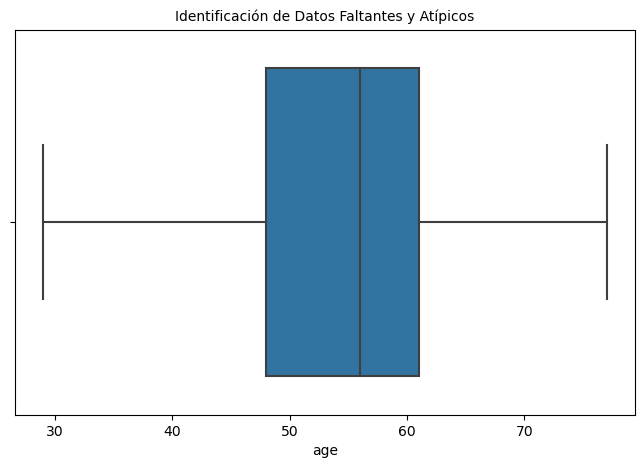

In [8]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(8, 5))
sns.boxplot(x=Data['age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

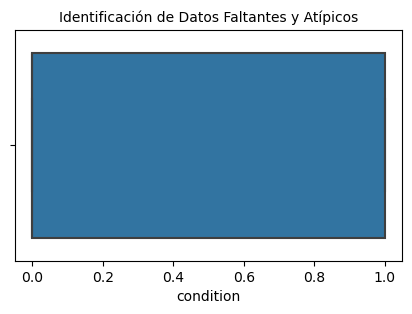

In [9]:
#Identificación de Datos Faltantes y Atípicos 2

plt.figure(figsize=(5, 3))
sns.boxplot(x=Data['condition'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

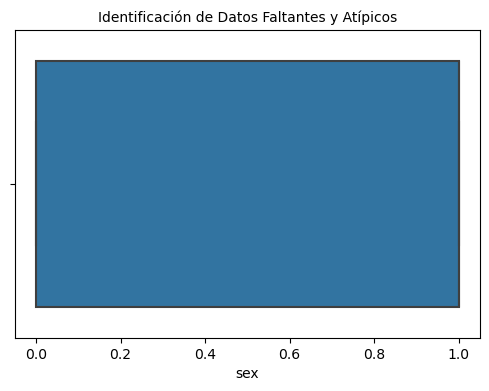

In [10]:
#Identificación de Datos Faltantes y Atípicos 2

plt.figure(figsize=(6, 4))
sns.boxplot(x=Data['sex'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

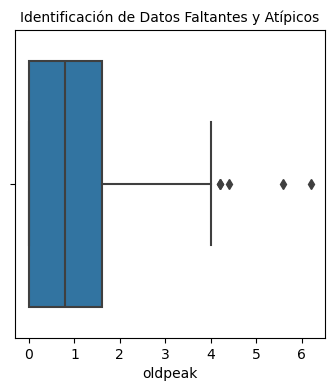

In [11]:
#Identificación de Datos Faltantes y Atípicos 2

plt.figure(figsize=(4, 4))
sns.boxplot(x=Data['oldpeak'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [24]:
print("2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.")

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.


In [12]:
#Revisión de datos faltantes

print("Cantidad de Registros de pacientes con cero en el campo sexo: ",Data['sex'].isin([0]).sum())
print("Cantidad de Registros de pacientes con cero en el campo cp: ",Data['cp'].isin([0]).sum())
print("Cantidad de Registros de pacientes con cero en el campo fbs: ",Data['fbs'].isin([0]).sum())
print("Cantidad de Registros de pacientes con cero en el campo restecg: ",Data['restecg'].isin([0]).sum())
print("Cantidad de Registros de pacientes con cero en el campo exang: ",Data['exang'].isin([0]).sum())
print("Cantidad de Registros de pacientes con cero en el campo oldpeak: ",Data['oldpeak'].isin([0]).sum())
print("Cantidad de Registros de pacientes con cero en el campo slope: ",Data['slope'].isin([0]).sum())
print("Cantidad de Registros de pacientes con cero en el campo ca: ",Data['ca'].isin([0]).sum())
print("Cantidad de Registros de pacientes con cero en el campo thal: ",Data['thal'].isin([0]).sum())


Cantidad de Registros de pacientes con cero en el campo sexo:  96
Cantidad de Registros de pacientes con cero en el campo cp:  23
Cantidad de Registros de pacientes con cero en el campo fbs:  254
Cantidad de Registros de pacientes con cero en el campo restecg:  147
Cantidad de Registros de pacientes con cero en el campo exang:  200
Cantidad de Registros de pacientes con cero en el campo oldpeak:  96
Cantidad de Registros de pacientes con cero en el campo slope:  139
Cantidad de Registros de pacientes con cero en el campo ca:  174
Cantidad de Registros de pacientes con cero en el campo thal:  164


In [13]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Data['sex']=Data['sex'].replace(0,Data['sex'].mean())
Data['cp']=Data['cp'].replace(0,Data['cp'].mean())
Data['fbs']=Data['fbs'].replace(0,Data['fbs'].mean())
Data['restecg']=Data['restecg'].replace(0,Data['restecg'].mean())
Data['exang']=Data['exang'].replace(0,Data['exang'].mean())
Data['oldpeak']=Data['oldpeak'].replace(0,Data['oldpeak'].mean())
Data['slope']=Data['slope'].replace(0,Data['slope'].mean())
Data['ca']=Data['ca'].replace(0,Data['ca'].mean())
Data['thal']=Data['thal'].replace(0,Data['thal'].mean())
#Data['condition']=Data['condition'].replace(0,Data['condition'].mean())


In [36]:
#Revisión nuevamente de datos faltantes
print("Cantidad de Registros de pacientes con cero en el campo sexo: ",Data['sex'].isin([0]).sum())
print("Cantidad de Registros de pacientes con cero en el campo cp: ",Data['cp'].isin([0]).sum())
print("Cantidad de Registros de pacientes con cero en el campo fbs: ",Data['fbs'].isin([0]).sum())
print("Cantidad de Registros de pacientes con cero en el campo restecg: ",Data['restecg'].isin([0]).sum())
print("Cantidad de Registros de pacientes con cero en el campo exang: ",Data['exang'].isin([0]).sum())
print("Cantidad de Registros de pacientes con cero en el campo oldpeak: ",Data['oldpeak'].isin([0]).sum())
print("Cantidad de Registros de pacientes con cero en el campo slope: ",Data['slope'].isin([0]).sum())
print("Cantidad de Registros de pacientes con cero en el campo ca: ",Data['ca'].isin([0]).sum())
print("Cantidad de Registros de pacientes con cero en el campo thal: ",Data['thal'].isin([0]).sum())
#print("Cantidad de Registros de pacientes con cero en el campo condition: ",Data['condition'].isin([0]).sum())


Cantidad de Registros de pacientes con cero en el campo sexo:  0
Cantidad de Registros de pacientes con cero en el campo cp:  0
Cantidad de Registros de pacientes con cero en el campo fbs:  0
Cantidad de Registros de pacientes con cero en el campo restecg:  0
Cantidad de Registros de pacientes con cero en el campo exang:  0
Cantidad de Registros de pacientes con cero en el campo oldpeak:  0
Cantidad de Registros de pacientes con cero en el campo slope:  0
Cantidad de Registros de pacientes con cero en el campo ca:  0
Cantidad de Registros de pacientes con cero en el campo thal:  0
Cantidad de Registros de pacientes con cero en el campo condition:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

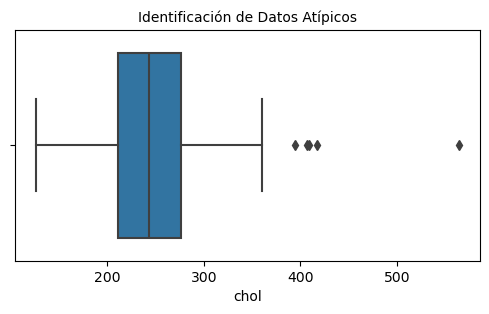

In [14]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['chol'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [15]:
#Conteo de Datos Atípicos

nivel_minimo=200
nivel_maximo=400
Total_Atipicos=((Data['chol']<nivel_minimo)|(Data['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 52


In [16]:
# Filtra Datos Atípicos

Data=Data[(Data['chol']<nivel_maximo)&(Data['chol']>nivel_minimo)]

In [17]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Data['chol']<nivel_minimo)|(Data['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [45]:
#Revisión del tipo de datos y datos faltantes

Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 296
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               244 non-null    int64  
 1   sex               244 non-null    float64
 2   cp                244 non-null    float64
 3   trestbps          244 non-null    int64  
 4   chol              244 non-null    int64  
 5   fbs               244 non-null    float64
 6   restecg           244 non-null    float64
 7   thalach           244 non-null    int64  
 8   exang             244 non-null    float64
 9   oldpeak           244 non-null    float64
 10  slope             244 non-null    float64
 11  ca                244 non-null    float64
 12  thal              244 non-null    float64
 13  condition         244 non-null    float64
 14  Nivel_Glucosa     244 non-null    float64
 15  Presión_Arterial  244 non-null    float64
 16  Grosor_Piel       244 non-null    float64
 17  Ni

In [46]:
print("3. Seleccionar las características más relevantes para entrenar el 3 modelo utilizando selección de características.")

3. Seleccionar las características más relevantes para entrenar el 3 modelo utilizando selección de características.


In [18]:
# Total de personas con enfermedad cardiaca 
#Característica de interes:

#Diabetico: si la persona tiene diabetes o no (0 = no tiene ataque cardiaco - 1 = si tiene ataque cardiaco)
#Predecir si una persona tiene o no ataque cardiaco

Data['condition'].value_counts()

condition
0    130
1    114
Name: count, dtype: int64

In [50]:
Data[['condition']].head(30)

,condition
0,0.461279
1,0.461279
2,0.461279
3,1.000000
4,0.461279
5,0.461279
6,0.461279
7,1.000000
8,0.461279
9,0.461279


In [51]:
print("4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.")


4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.


In [19]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Data.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condicion  
Y = Data['condition'] # Se cargan los datos de train con los datos de la la columna condicion

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [53]:
print (X_train)

     age       sex        cp  trestbps  chol       fbs   restecg  thalach  \
5     64  1.000000  2.158249       170   227  0.144781  2.000000      155   
274   46  1.000000  3.000000       120   249  0.144781  2.000000      144   
48    52  1.000000  1.000000       128   205  1.000000  0.996633      184   
42    55  0.676768  1.000000       132   342  0.144781  0.996633      166   
149   41  0.676768  2.000000       112   268  0.144781  2.000000      172   
..   ...       ...       ...       ...   ...       ...       ...      ...   
26    66  1.000000  1.000000       160   246  0.144781  0.996633      120   
154   37  0.676768  2.000000       120   215  0.144781  0.996633      170   
71    29  1.000000  1.000000       130   204  0.144781  2.000000      202   
61    44  1.000000  1.000000       120   220  0.144781  0.996633      170   
30    59  1.000000  1.000000       140   221  0.144781  0.996633      164   

        exang   oldpeak     slope        ca      thal  Nivel_Glucosa  \
5  

In [54]:
print (Y_train)

5      0.461279
274    1.000000
48     0.461279
42     0.461279
149    0.461279
         ...   
26     1.000000
154    0.461279
71     0.461279
61     0.461279
30     0.461279
Name: condition, Length: 183, dtype: float64


In [55]:
print("5. Entrenar el modelo configurando los diferentes hiperparámetros")

5. Entrenar el modelo configurando los diferentes hiperparámetros


In [21]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test)

In [22]:
print (Y_test)

110    0
206    1
188    0
167    1
195    1
      ..
181    1
254    0
234    1
235    1
260    1
Name: condition, Length: 61, dtype: int64


In [23]:
print (Prediccion)

[0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1]


In [25]:
print(" 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc")

 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc


In [26]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        33
           1       0.78      0.64      0.71        28

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [27]:
print(" 7 Realizar las diferentes gráficas que permitan visualizar losresultados del modelo.")

 7 Realizar las diferentes gráficas que permitan visualizar losresultados del modelo.


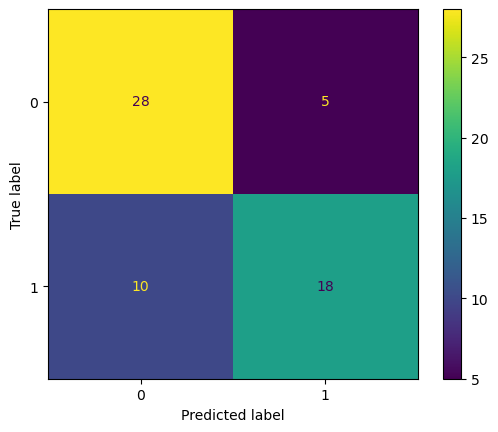

In [28]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

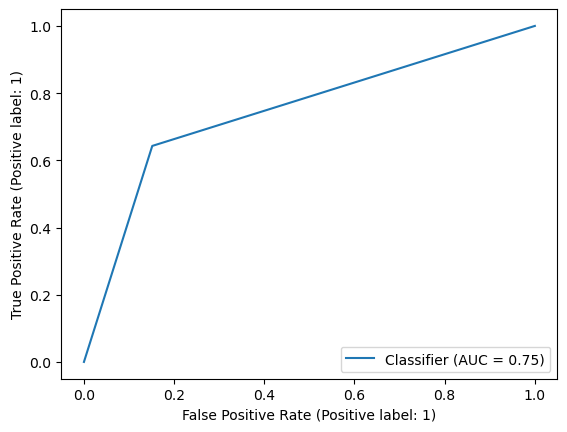

In [29]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()